### Iris Dataset Classification using K-Means Clustering

This notebook is a simple example of how to use K-Means clustering algorithm to classify the Iris dataset. The Iris dataset is a simple dataset that contains 150 samples of iris flowers. Each sample contains 4 features: sepal length, sepal width, petal length, and petal width. The dataset is labeled with 3 classes: Iris-setosa, Iris-versicolour, and Iris-virginica. The data is available in the `sklearn.datasets` module.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


In [2]:
# Load the Iris dataset 
iris = load_iris()
X = iris.data
y = iris.target
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (150, 4)
y shape:  (150,)


In [3]:
# Initialize the centroids - select random data points as centroids
def initialize_centroids(X, k):
    indices = np.random.choice(X.shape[0], k, replace=False)
    print("Initial Centroids: ", indices)
    return X[indices]

In [4]:
# Assign clusters using the Euclidean distance - find the nearest centroid for each data point
def assign_clusters(X, centroids):
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

In [5]:
# compute centroids - find the new centroid for each cluster
def compute_centroids(X, clusters, k):
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        centroids[i] = X[clusters == i].mean(axis=0)
    return centroids

In [6]:
# kmeans algorithm
def kmeans(X, k, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(X, k) # Step 1: Initialize the centroids
    for _ in range(max_iters):
        clusters = assign_clusters(X, centroids) # Step 2: Assign clusters
        new_centroids = compute_centroids(X, clusters, k) # Step 3: Compute new centroids
        if np.all(np.abs(new_centroids - centroids) < tol): # Check for convergence
            break
        centroids = new_centroids # Update the centroids
    return centroids, clusters

In [7]:
# get the number of target classes
k = len(np.unique(y))
print(f"Number of classes: {k}")

# Run the kmeans algorithm
centroids, clusters = kmeans(X, k)
print(f"Final centroids:\n{centroids}")
print(f"Final cluster assignments:\n{clusters}")

Number of classes: 3
Initial Centroids:  [ 72  67 119]
Final centroids:
[[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]
Final cluster assignments:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


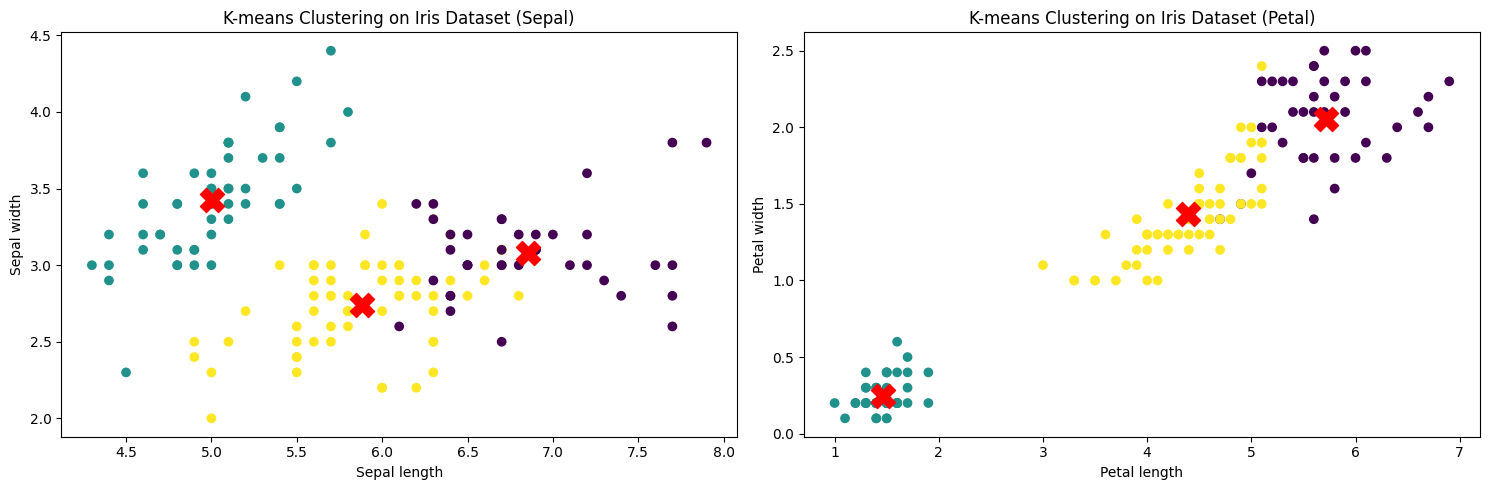

In [8]:
# Visualize the results on sepal and petal dimensions
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
titles = ['K-means Clustering on Iris Dataset (Sepal)', 'K-means Clustering on Iris Dataset (Petal)']
x_labels = ['Sepal length', 'Petal length']
y_labels = ['Sepal width', 'Petal width']
for i, ax in enumerate(axes):
    ax.scatter(X[:, 2*i], X[:, 2*i+1], c=clusters, cmap='viridis')
    ax.scatter(centroids[:, 2*i], centroids[:, 2*i+1], s=300, c='red', marker='X')
    ax.set_xlabel(x_labels[i])
    ax.set_ylabel(y_labels[i])
    ax.set_title(titles[i])
plt.tight_layout()